# Neural Network Visualizations

This notebook generates all visualizations for understanding neural networks:

1. **Static Diagrams:**
   - Single-layer neural network (detailed with values)
   - Single-layer neural network (simplified architecture)
   - VGG16 architecture (horizontal overview)
   - VGG16 architecture (detailed vertical layout)

2. **Animated GIFs:**
   - Neural network forward pass
   - Curve fitting with MSE minimization
   - Backpropagation through the network

All outputs will be saved to the `outputs/` directory.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Circle, FancyArrowPatch, FancyBboxPatch, Rectangle
import matplotlib.patches as patches
from matplotlib.collections import LineCollection
import os
from scipy import stats

# Create outputs directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4
Matplotlib version: 3.10.7


## 1. Single-Layer Neural Network (Detailed)

✓ Single-layer neural network (detailed) saved!


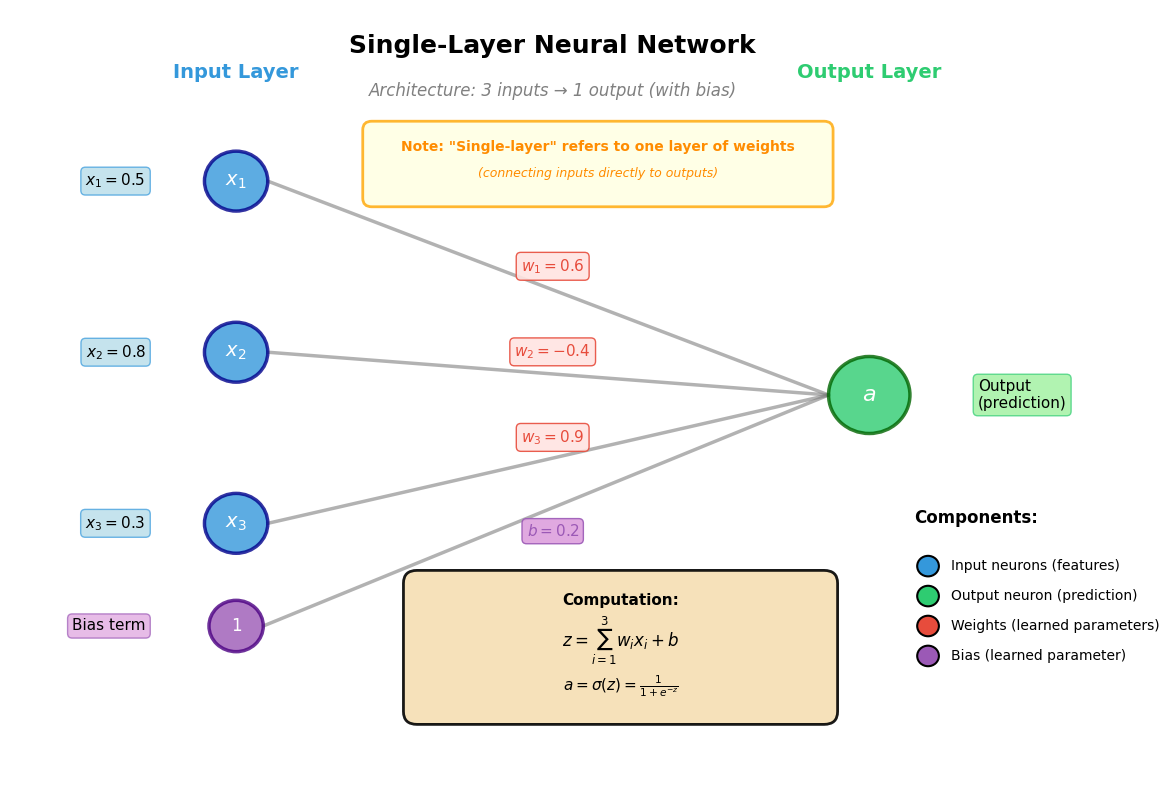

In [3]:
# Neural network parameters
inputs = np.array([0.5, 0.8, 0.3])
weights = np.array([0.6, -0.4, 0.9])
bias = 0.2

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 8)
ax.axis('off')

# Title
ax.text(5, 7.5, 'Single-Layer Neural Network', fontsize=18, weight='bold', ha='center')
ax.text(5, 7, 'Architecture: 3 inputs → 1 output (with bias)', fontsize=12, ha='center', style='italic', color='gray')

# Positions for neurons
input_positions = [(1.5, 6 - i*2) for i in range(len(inputs))]
output_position = (8.5, 3.5)

# Colors
input_color = '#3498db'
output_color = '#2ecc71'
weight_color = '#e74c3c'
bias_color = '#9b59b6'

# Draw input layer label
ax.text(1.5, 7.2, 'Input Layer', fontsize=14, weight='bold', ha='center', color=input_color)

# Draw input neurons
for i, pos in enumerate(input_positions):
    circle = Circle(pos, 0.35, facecolor=input_color, alpha=0.8, zorder=3, edgecolor='darkblue', linewidth=2.5)
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], f'$x_{i+1}$', ha='center', va='center', 
            fontsize=14, weight='bold', zorder=4, color='white')
    ax.text(pos[0] - 1.0, pos[1], f'$x_{i+1} = {inputs[i]}$', 
            fontsize=11, ha='right', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7, edgecolor=input_color))

# Draw output layer label
ax.text(8.5, 7.2, 'Output Layer', fontsize=14, weight='bold', ha='center', color=output_color)

# Draw output neuron
output_circle = Circle(output_position, 0.45, facecolor=output_color, alpha=0.8, zorder=3, 
                       edgecolor='darkgreen', linewidth=2.5)
ax.add_patch(output_circle)
ax.text(output_position[0], output_position[1], '$a$', ha='center', va='center', 
        fontsize=16, weight='bold', zorder=4, color='white')
ax.text(output_position[0] + 1.2, output_position[1], 'Output\n(prediction)', 
        fontsize=11, ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7, edgecolor=output_color))

# Draw connections
for i, (inp_pos, w) in enumerate(zip(input_positions, weights)):
    line = plt.Line2D([inp_pos[0] + 0.35, output_position[0] - 0.45],
                     [inp_pos[1], output_position[1]],
                     linewidth=2.5, color='gray', alpha=0.6, zorder=1)
    ax.add_line(line)
    mid_x = (inp_pos[0] + output_position[0]) / 2
    mid_y = (inp_pos[1] + output_position[1]) / 2
    ax.text(mid_x, mid_y + 0.2, f'$w_{i+1} = {w}$', fontsize=11, ha='center', 
            weight='bold', color=weight_color,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='mistyrose', alpha=0.9, edgecolor=weight_color))

# Draw bias
bias_pos = (1.5, 0.8)
bias_circle = Circle(bias_pos, 0.3, facecolor=bias_color, alpha=0.8, zorder=3, 
                    edgecolor='indigo', linewidth=2.5)
ax.add_patch(bias_circle)
ax.text(bias_pos[0], bias_pos[1], '$1$', ha='center', va='center', 
        fontsize=12, weight='bold', zorder=4, color='white')
ax.text(bias_pos[0] - 1.0, bias_pos[1], 'Bias term', 
        fontsize=11, ha='right', va='center',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='plum', alpha=0.7, edgecolor=bias_color))

# Bias connection
bias_line = plt.Line2D([bias_pos[0] + 0.3, output_position[0] - 0.45],
                      [bias_pos[1], output_position[1]],
                      linewidth=2.5, color='gray', alpha=0.6, zorder=1)
ax.add_line(bias_line)
bias_mid_x = (bias_pos[0] + output_position[0]) / 2
bias_mid_y = (bias_pos[1] + output_position[1]) / 2
ax.text(bias_mid_x, bias_mid_y - 0.3, f'$b = {bias}$', fontsize=11, ha='center', 
        weight='bold', color=bias_color,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='plum', alpha=0.9, edgecolor=bias_color))

# Computation box
computation_y = 0.8
computation_box = FancyBboxPatch((3.5, computation_y - 1), 4.5, 1.5,
                                boxstyle="round,pad=0.15", 
                                edgecolor='black', facecolor='wheat',
                                linewidth=2, alpha=0.9, zorder=10)
ax.add_patch(computation_box)
ax.text(5.75, computation_y + 0.25, 'Computation:', fontsize=11, weight='bold', ha='center', zorder=11)
ax.text(5.75, computation_y - 0.25, r'$z = \sum_{i=1}^{3} w_i x_i + b$', fontsize=12, ha='center', zorder=11)
ax.text(5.75, computation_y - 0.75, r'$a = \sigma(z) = \frac{1}{1 + e^{-z}}$', fontsize=11, ha='center', zorder=11)

# Legend
legend_x = 9
legend_y = 1.5
ax.text(legend_x, legend_y + 0.5, 'Components:', fontsize=12, weight='bold')
legend_items = [
    (input_color, 'Input neurons (features)'),
    (output_color, 'Output neuron (prediction)'),
    (weight_color, 'Weights (learned parameters)'),
    (bias_color, 'Bias (learned parameter)'),
]
for i, (color, label) in enumerate(legend_items):
    y = legend_y - i * 0.35
    legend_circle = Circle((legend_x + 0.15, y), 0.12, facecolor=color, 
                          edgecolor='black', linewidth=1.5, zorder=3)
    ax.add_patch(legend_circle)
    ax.text(legend_x + 0.4, y, label, fontsize=10, va='center')

# Note
note_box = FancyBboxPatch((3.0, 5.8), 5.0, 0.8,
                         boxstyle="round,pad=0.1", 
                         edgecolor='orange', facecolor='lightyellow',
                         linewidth=2, alpha=0.8, zorder=5)
ax.add_patch(note_box)
ax.text(5.5, 6.35, 'Note: "Single-layer" refers to one layer of weights', 
        fontsize=10, ha='center', weight='bold', color='darkorange', zorder=6)
ax.text(5.5, 6.05, '(connecting inputs directly to outputs)', 
        fontsize=9, ha='center', style='italic', color='darkorange', zorder=6)

plt.tight_layout()
plt.savefig('outputs/single_layer_neural_network.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print("✓ Single-layer neural network (detailed) saved!")
plt.show()

## 2. Single-Layer Neural Network (Simplified Architecture)

✓ Single-layer neural network (simplified) saved!


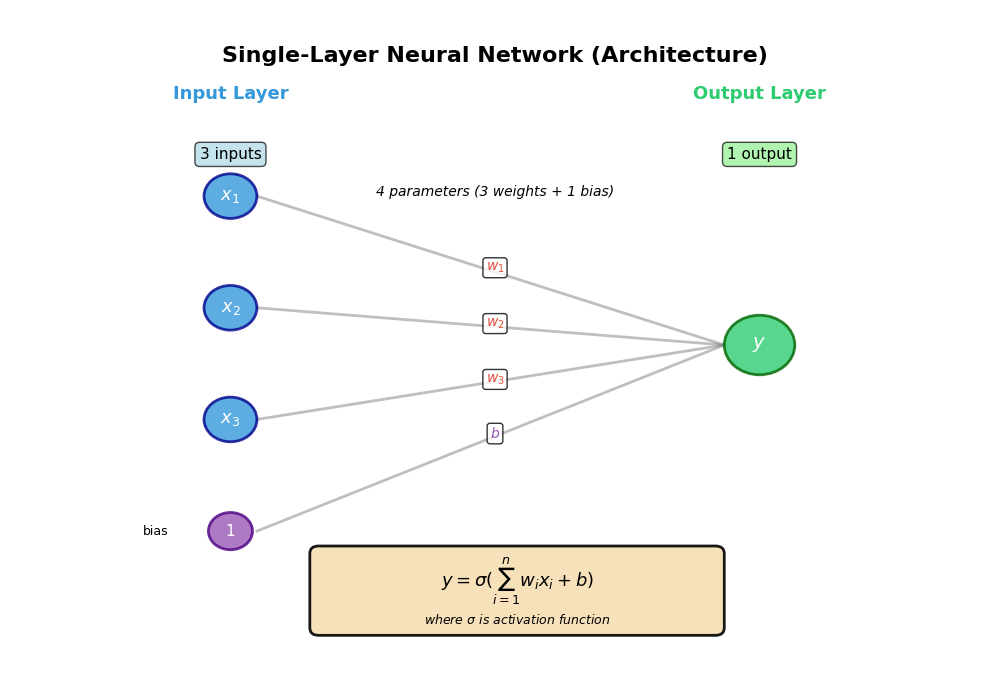

In [4]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 8)
ax.axis('off')

ax.text(4.5, 7.3, 'Single-Layer Neural Network (Architecture)', fontsize=16, weight='bold', ha='center')

input_color = '#3498db'
output_color = '#2ecc71'
weight_color = '#e74c3c'
bias_color = '#9b59b6'

ax.text(1.5, 6.8, 'Input Layer', fontsize=13, weight='bold', ha='center', color=input_color)

# Input neurons
input_simple_pos = [(1.5, 5.5 - i*1.5) for i in range(3)]
for i, pos in enumerate(input_simple_pos):
    circle = Circle(pos, 0.3, facecolor=input_color, alpha=0.8, zorder=3, edgecolor='darkblue', linewidth=2)
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], f'$x_{i+1}$', ha='center', va='center', 
            fontsize=13, weight='bold', zorder=4, color='white')

# Bias
bias_simple_pos = (1.5, 1.0)
bias_circle = Circle(bias_simple_pos, 0.25, facecolor=bias_color, alpha=0.8, zorder=3, 
                    edgecolor='indigo', linewidth=2)
ax.add_patch(bias_circle)
ax.text(bias_simple_pos[0], bias_simple_pos[1], '$1$', ha='center', va='center', 
        fontsize=11, weight='bold', zorder=4, color='white')
ax.text(bias_simple_pos[0] - 0.7, bias_simple_pos[1], 'bias', fontsize=9, ha='right', va='center')

ax.text(7.5, 6.8, 'Output Layer', fontsize=13, weight='bold', ha='center', color=output_color)

# Output neuron
output_simple_pos = (7.5, 3.5)
output_circle = Circle(output_simple_pos, 0.4, facecolor=output_color, alpha=0.8, zorder=3, 
                       edgecolor='darkgreen', linewidth=2)
ax.add_patch(output_circle)
ax.text(output_simple_pos[0], output_simple_pos[1], '$y$', ha='center', va='center', 
        fontsize=14, weight='bold', zorder=4, color='white')

# Connections
all_input_pos = input_simple_pos + [bias_simple_pos]
for i, inp_pos in enumerate(all_input_pos):
    line = plt.Line2D([inp_pos[0] + 0.3, output_simple_pos[0] - 0.4],
                     [inp_pos[1], output_simple_pos[1]],
                     linewidth=2, color='gray', alpha=0.5, zorder=1)
    ax.add_line(line)
    mid_x = (inp_pos[0] + output_simple_pos[0]) / 2
    mid_y = (inp_pos[1] + output_simple_pos[1]) / 2
    if i < 3:
        ax.text(mid_x, mid_y, f'$w_{i+1}$', fontsize=10, ha='center', 
                color=weight_color, weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))
    else:
        ax.text(mid_x, mid_y, '$b$', fontsize=10, ha='center', 
                color=bias_color, weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# Formula
formula_box = FancyBboxPatch((2.5, -0.3), 4.5, 1.0,
                            boxstyle="round,pad=0.1", 
                            edgecolor='black', facecolor='wheat',
                            linewidth=2, alpha=0.9, zorder=10)
ax.add_patch(formula_box)
ax.text(4.75, 0.25, r'$y = \sigma(\sum_{i=1}^{n} w_i x_i + b)$', 
        fontsize=13, ha='center', zorder=11, weight='bold')
ax.text(4.75, -0.25, r'where $\sigma$ is activation function', 
        fontsize=9, ha='center', zorder=11, style='italic')

# Annotations
ax.text(1.5, 6.0, '3 inputs', fontsize=11, ha='center', 
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
ax.text(4.5, 5.5, '4 parameters (3 weights + 1 bias)', fontsize=10, ha='center', style='italic')
ax.text(7.5, 6.0, '1 output', fontsize=11, ha='center',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig('outputs/single_layer_nn_simple.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print("✓ Single-layer neural network (simplified) saved!")
plt.show()

## 3. VGG16 Architecture (Horizontal Overview)

This will take a moment to render as it's a complex diagram...

✓ VGG16 architecture (horizontal) saved!


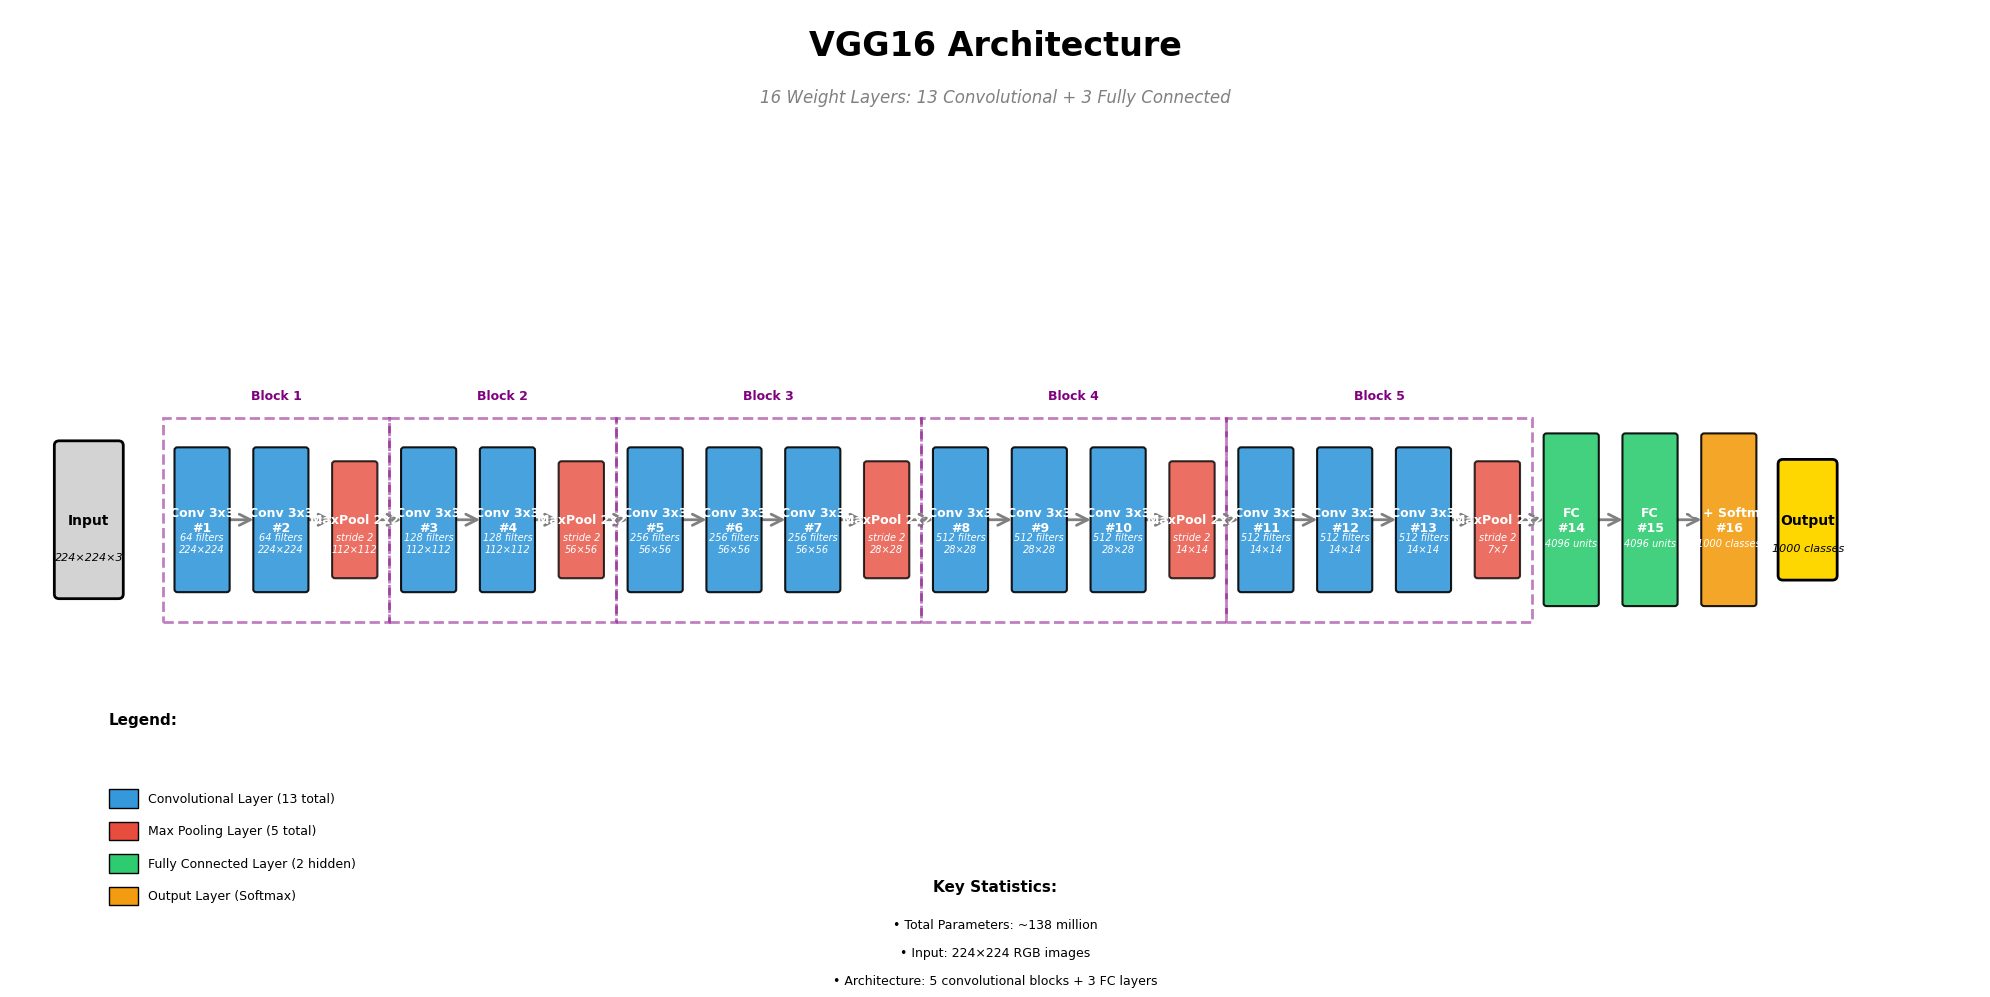

In [5]:
# VGG16 horizontal overview
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.axis('off')

ax.text(10, 9.5, 'VGG16 Architecture', fontsize=24, weight='bold', ha='center')
ax.text(10, 9, '16 Weight Layers: 13 Convolutional + 3 Fully Connected', 
        fontsize=12, ha='center', style='italic', color='gray')

conv_color = '#3498db'
pool_color = '#e74c3c'
fc_color = '#2ecc71'
softmax_color = '#f39c12'

architecture = [
    ('Conv 3x3', 'conv', 64, (224, 224), 2),
    ('MaxPool 2x2', 'pool', 64, (112, 112), 1),
    ('Conv 3x3', 'conv', 128, (112, 112), 2),
    ('MaxPool 2x2', 'pool', 128, (56, 56), 1),
    ('Conv 3x3', 'conv', 256, (56, 56), 3),
    ('MaxPool 2x2', 'pool', 256, (28, 28), 1),
    ('Conv 3x3', 'conv', 512, (28, 28), 3),
    ('MaxPool 2x2', 'pool', 512, (14, 14), 1),
    ('Conv 3x3', 'conv', 512, (14, 14), 3),
    ('MaxPool 2x2', 'pool', 512, (7, 7), 1),
    ('FC', 'fc', 4096, None, 1),
    ('FC', 'fc', 4096, None, 1),
    ('FC', 'fc', 1000, None, 1),
]

x_pos = 0.5
y_base = 4.5
block_num = 1

# Input
input_box = FancyBboxPatch((x_pos, y_base - 0.8), 0.6, 1.6,
                          boxstyle="round,pad=0.05", 
                          edgecolor='black', facecolor='lightgray',
                          linewidth=2, zorder=2)
ax.add_patch(input_box)
ax.text(x_pos + 0.3, y_base, 'Input', ha='center', va='center', 
        fontsize=10, weight='bold')
ax.text(x_pos + 0.3, y_base - 0.4, '224×224×3', ha='center', va='center', 
        fontsize=8, style='italic')
x_pos += 1.2

conv_block_start = x_pos
layers_in_block = []
layer_count = 0

def draw_layer(x, y, width, height, color, label, details, alpha=0.9):
    box = FancyBboxPatch((x, y - height/2), width, height,
                         boxstyle="round,pad=0.03", 
                         edgecolor='black', facecolor=color,
                         linewidth=1.5, alpha=alpha, zorder=2)
    ax.add_patch(box)
    ax.text(x + width/2, y, label, ha='center', va='center', 
            fontsize=9, weight='bold', color='white')
    if details:
        ax.text(x + width/2, y - 0.25, details, ha='center', va='center', 
                fontsize=7, color='white', style='italic')

def draw_arrow(x1, x2, y):
    arrow = FancyArrowPatch((x1, y), (x2, y),
                           arrowstyle='->', mutation_scale=20,
                           linewidth=2, color='gray', zorder=1)
    ax.add_patch(arrow)

for i, (name, layer_type, filters, size, repetitions) in enumerate(architecture):
    if layer_type == 'conv':
        width = 0.5
        height = 1.5
        color = conv_color
        base_label = name
        
        for rep in range(repetitions):
            layer_count += 1
            detail = f'{filters} filters\n{size[0]}×{size[1]}' if size else f'{filters}'
            label = f'{base_label}\n#{layer_count}'
            draw_layer(x_pos, y_base, width, height, color, label, detail)
            layers_in_block.append(x_pos + width/2)
            if rep < repetitions - 1 or i < len(architecture) - 1:
                draw_arrow(x_pos + width, x_pos + width + 0.3, y_base)
            x_pos += width + 0.3
    
    elif layer_type == 'pool':
        width = 0.4
        height = 1.2
        color = pool_color
        detail = f'stride 2\n{size[0]}×{size[1]}' if size else ''
        label = name
        draw_layer(x_pos, y_base, width, height, color, label, detail, alpha=0.8)
        if i < len(architecture) - 1:
            draw_arrow(x_pos + width, x_pos + width + 0.3, y_base)
        
        if len(layers_in_block) > 0:
            block_start = conv_block_start - 0.15
            block_end = x_pos + width + 0.15
            block_box = patches.Rectangle((block_start, y_base - 1.1), 
                                         block_end - block_start, 2.2,
                                         linewidth=2, edgecolor='purple', 
                                         facecolor='none', linestyle='--',
                                         alpha=0.5, zorder=0)
            ax.add_patch(block_box)
            ax.text((block_start + block_end)/2, y_base + 1.3, 
                   f'Block {block_num}', ha='center', fontsize=9, 
                   weight='bold', color='purple')
            block_num += 1
            layers_in_block = []
            conv_block_start = x_pos + width + 0.3
        x_pos += width + 0.3
    
    elif layer_type == 'fc':
        width = 0.5
        height = 1.8
        color = fc_color
        layer_count += 1
        
        if filters == 1000:
            detail = f'{filters} classes'
            label = f'FC + Softmax\n#{layer_count}'
            color = softmax_color
        else:
            detail = f'{filters} units'
            label = f'{name}\n#{layer_count}'
        
        draw_layer(x_pos, y_base, width, height, color, label, detail)
        if i < len(architecture) - 1:
            draw_arrow(x_pos + width, x_pos + width + 0.3, y_base)
        x_pos += width + 0.3

# Output
output_box = FancyBboxPatch((x_pos, y_base - 0.6), 0.5, 1.2,
                           boxstyle="round,pad=0.05", 
                           edgecolor='black', facecolor='gold',
                           linewidth=2, zorder=2)
ax.add_patch(output_box)
ax.text(x_pos + 0.25, y_base, 'Output', ha='center', va='center', 
        fontsize=10, weight='bold')
ax.text(x_pos + 0.25, y_base - 0.3, '1000 classes', ha='center', va='center', 
        fontsize=8, style='italic')

# Legend
legend_y = 1.5
legend_x = 1
legend_items = [
    (conv_color, 'Convolutional Layer (13 total)'),
    (pool_color, 'Max Pooling Layer (5 total)'),
    (fc_color, 'Fully Connected Layer (2 hidden)'),
    (softmax_color, 'Output Layer (Softmax)')
]
ax.text(legend_x, legend_y + 0.8, 'Legend:', fontsize=11, weight='bold')
for i, (color, label) in enumerate(legend_items):
    y = legend_y - i * 0.35
    legend_box = patches.Rectangle((legend_x, y - 0.1), 0.3, 0.2,
                                   facecolor=color, edgecolor='black', linewidth=1)
    ax.add_patch(legend_box)
    ax.text(legend_x + 0.4, y, label, fontsize=9, va='center')

# Statistics
stats_y = 0.5
ax.text(10, stats_y, 'Key Statistics:', fontsize=11, weight='bold', ha='center')
ax.text(10, stats_y - 0.4, '• Total Parameters: ~138 million', fontsize=9, ha='center')
ax.text(10, stats_y - 0.7, '• Input: 224×224 RGB images', fontsize=9, ha='center')
ax.text(10, stats_y - 1.0, '• Architecture: 5 convolutional blocks + 3 FC layers', fontsize=9, ha='center')

plt.tight_layout()
plt.savefig('outputs/vgg16_architecture.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print("✓ VGG16 architecture (horizontal) saved!")
plt.show()

## 4. VGG16 Architecture (Detailed Vertical Layout)

✓ VGG16 architecture (detailed) saved!


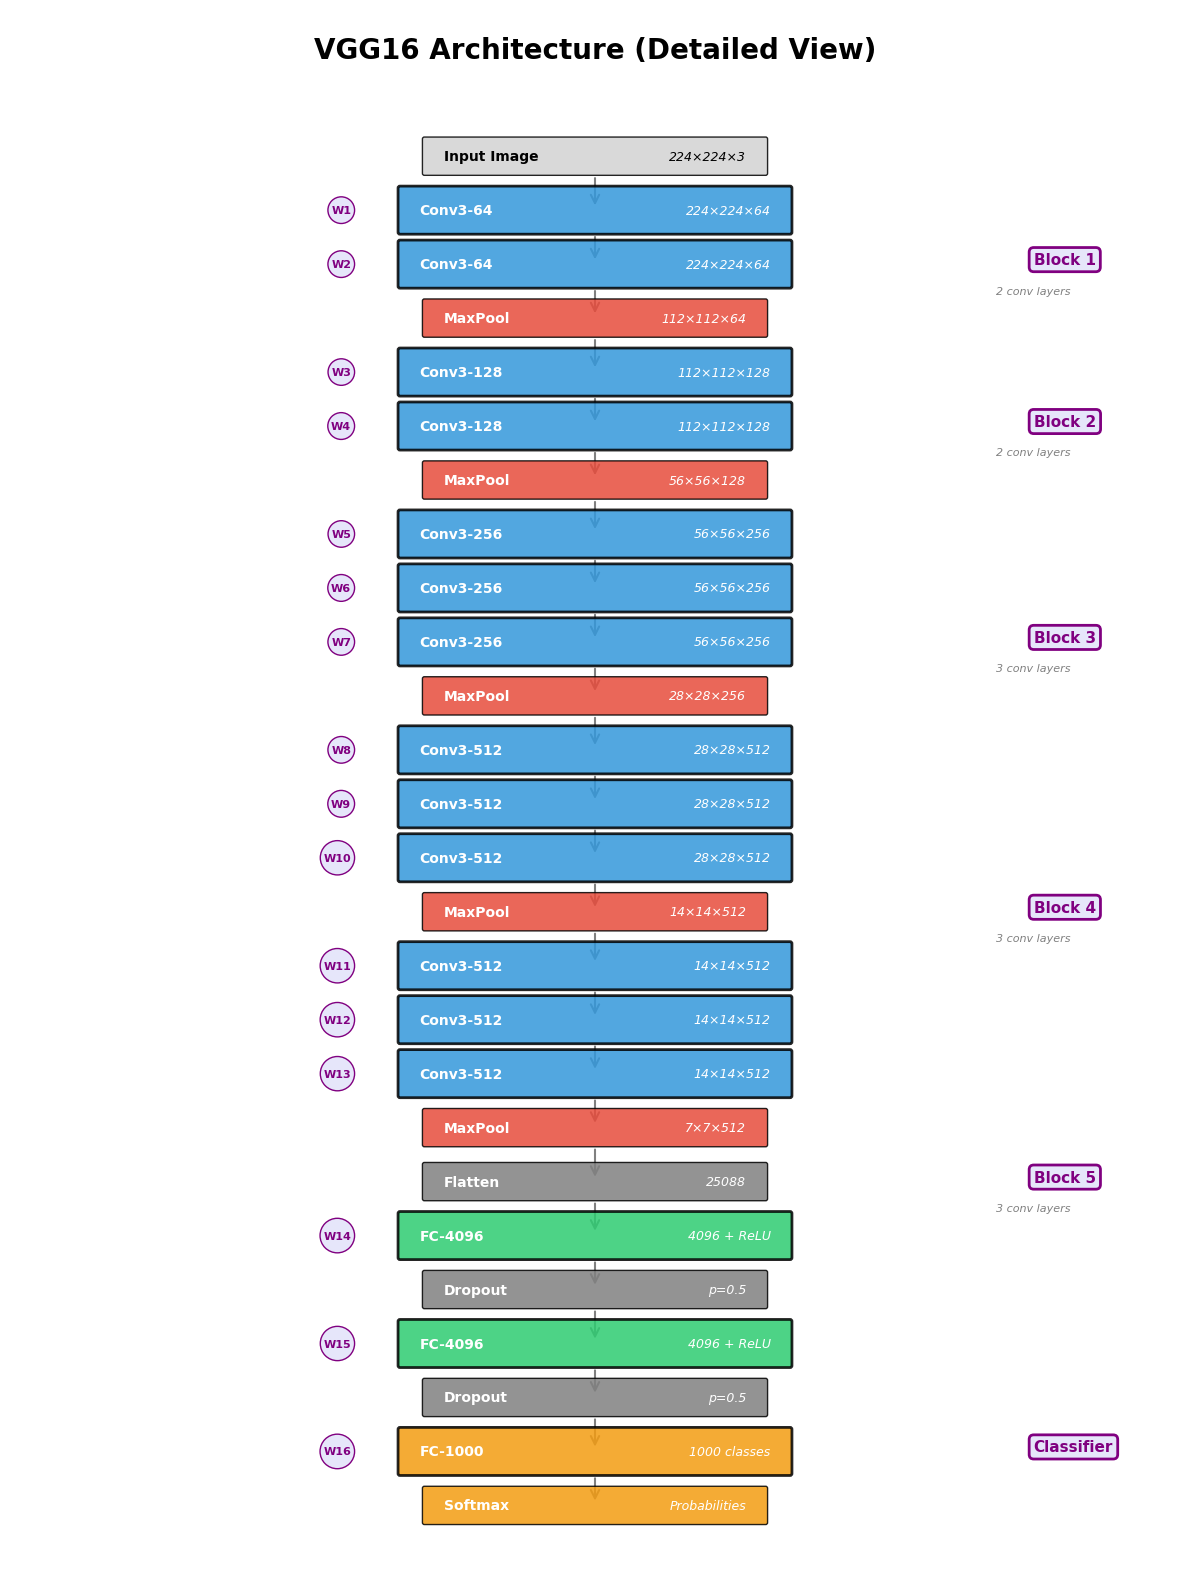

In [6]:
# VGG16 detailed vertical layout
fig, ax = plt.subplots(figsize=(12, 16))
ax.set_xlim(0, 12)
ax.set_ylim(0, 16)
ax.axis('off')

ax.text(6, 15.5, 'VGG16 Architecture (Detailed View)', fontsize=20, weight='bold', ha='center')

conv_color = '#3498db'
pool_color = '#e74c3c'
fc_color = '#2ecc71'
softmax_color = '#f39c12'

layers_detailed = [
    ('Input Image', '224×224×3', 'lightgray', 0),
    ('Conv3-64', '224×224×64', conv_color, 1),
    ('Conv3-64', '224×224×64', conv_color, 2),
    ('MaxPool', '112×112×64', pool_color, 0),
    ('Conv3-128', '112×112×128', conv_color, 3),
    ('Conv3-128', '112×112×128', conv_color, 4),
    ('MaxPool', '56×56×128', pool_color, 0),
    ('Conv3-256', '56×56×256', conv_color, 5),
    ('Conv3-256', '56×56×256', conv_color, 6),
    ('Conv3-256', '56×56×256', conv_color, 7),
    ('MaxPool', '28×28×256', pool_color, 0),
    ('Conv3-512', '28×28×512', conv_color, 8),
    ('Conv3-512', '28×28×512', conv_color, 9),
    ('Conv3-512', '28×28×512', conv_color, 10),
    ('MaxPool', '14×14×512', pool_color, 0),
    ('Conv3-512', '14×14×512', conv_color, 11),
    ('Conv3-512', '14×14×512', conv_color, 12),
    ('Conv3-512', '14×14×512', conv_color, 13),
    ('MaxPool', '7×7×512', pool_color, 0),
    ('Flatten', '25088', 'gray', 0),
    ('FC-4096', '4096 + ReLU', fc_color, 14),
    ('Dropout', 'p=0.5', 'gray', 0),
    ('FC-4096', '4096 + ReLU', fc_color, 15),
    ('Dropout', 'p=0.5', 'gray', 0),
    ('FC-1000', '1000 classes', softmax_color, 16),
    ('Softmax', 'Probabilities', softmax_color, 0),
]

y_pos = 14.5
y_step = 0.55

for i, (name, details, color, weight_layer) in enumerate(layers_detailed):
    if 'Conv' in name or 'FC' in name:
        width = 4
        height = 0.45
        linewidth = 2 if weight_layer > 0 else 1.5
    else:
        width = 3.5
        height = 0.35
        linewidth = 1
    
    x_center = 6
    box = FancyBboxPatch((x_center - width/2, y_pos - height/2), width, height,
                         boxstyle="round,pad=0.02", 
                         edgecolor='black', facecolor=color,
                         linewidth=linewidth, alpha=0.85, zorder=2)
    ax.add_patch(box)
    
    ax.text(x_center - width/2 + 0.2, y_pos, name, ha='left', va='center', 
            fontsize=10, weight='bold', color='white' if color != 'lightgray' else 'black')
    ax.text(x_center + width/2 - 0.2, y_pos, details, ha='right', va='center', 
            fontsize=9, style='italic', color='white' if color != 'lightgray' else 'black')
    
    if weight_layer > 0:
        ax.text(x_center - width/2 - 0.5, y_pos, f'W{weight_layer}', ha='right', va='center',
                fontsize=8, weight='bold', color='purple',
                bbox=dict(boxstyle='circle', facecolor='lavender', edgecolor='purple'))
    
    if i < len(layers_detailed) - 1:
        arrow = FancyArrowPatch((x_center, y_pos - height/2 - 0.02), 
                               (x_center, y_pos - y_step + 0.02),
                               arrowstyle='->', mutation_scale=15,
                               linewidth=1.5, color='gray', zorder=1)
        ax.add_patch(arrow)
    
    y_pos -= y_step

# Block annotations
block_annotations = [
    (14.5 - 2*y_step, 'Block 1', 2),
    (14.5 - 5*y_step, 'Block 2', 2),
    (14.5 - 9*y_step, 'Block 3', 3),
    (14.5 - 14*y_step, 'Block 4', 3),
    (14.5 - 19*y_step, 'Block 5', 3),
    (14.5 - 24*y_step, 'Classifier', 3),
]

for y, label, num_conv in block_annotations:
    ax.text(10.5, y, label, fontsize=11, weight='bold', color='purple',
            bbox=dict(boxstyle='round', facecolor='lavender', edgecolor='purple', linewidth=2))
    if 'Block' in label:
        ax.text(10.5, y - 0.3, f'{num_conv} conv layers', fontsize=8, 
                color='gray', style='italic', ha='center')

plt.tight_layout()
plt.savefig('outputs/vgg16_architecture_detailed.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print("✓ VGG16 architecture (detailed) saved!")
plt.show()

## 5. Weight *distributions* instead of static parameters

This creates a visualization of two Gaussian distributed parameters, with different means and standard deviations.

✓ Gaussian weight PDFs saved!


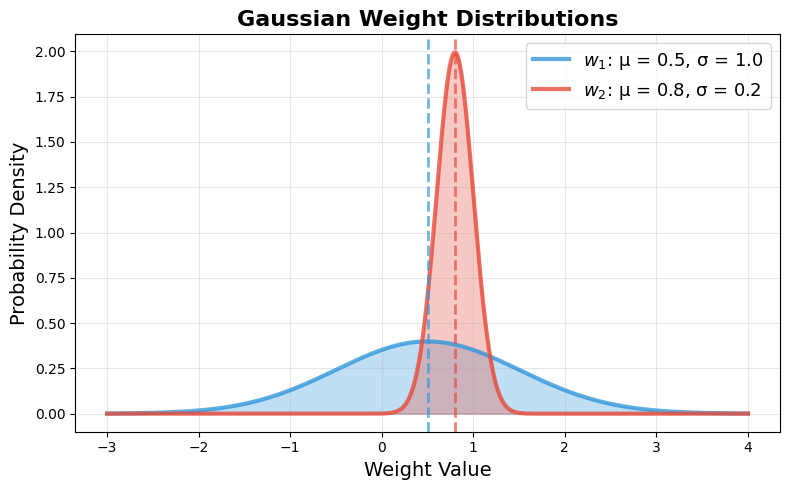


w₁ ~ N(0.5, 1.0²)
w₂ ~ N(0.8, 0.2²)


In [7]:
# Define parameters for the two weights
# Weight 1: mean=0.5, std=1.0
mu1 = 0.5
sigma1 = 1.0

# Weight 2: mean=0.8, std=0.2
mu2 = 0.8
sigma2 = 0.2

# Create x range for plotting
x_range = np.linspace(-3, 4, 1000)

# Calculate probability density functions
pdf1 = stats.norm.pdf(x_range, mu1, sigma1)
pdf2 = stats.norm.pdf(x_range, mu2, sigma2)

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))

# Colors
color1 = '#3498db'  # Blue
color2 = '#e74c3c'  # Red

# Plot PDFs
ax.plot(x_range, pdf1, linewidth=3, color=color1, 
        label=f'$w_1$: μ = {mu1}, σ = {sigma1}', alpha=0.8)
ax.fill_between(x_range, pdf1, alpha=0.3, color=color1)

ax.plot(x_range, pdf2, linewidth=3, color=color2, 
        label=f'$w_2$: μ = {mu2}, σ = {sigma2}', alpha=0.8)
ax.fill_between(x_range, pdf2, alpha=0.3, color=color2)

# Mark means with vertical lines
ax.axvline(mu1, color=color1, linestyle='--', linewidth=2, alpha=0.7)
ax.axvline(mu2, color=color2, linestyle='--', linewidth=2, alpha=0.7)

# Labels and title
ax.set_xlabel('Weight Value', fontsize=14)
ax.set_ylabel('Probability Density', fontsize=14)
ax.set_title('Gaussian Weight Distributions', fontsize=16, weight='bold')
ax.legend(fontsize=13, loc='upper right')
ax.grid(True, alpha=0.3)

# Clean up
plt.tight_layout()
plt.savefig('outputs/gaussian_weights_pdf.png', dpi=300, 
            bbox_inches='tight', facecolor='white')
print("✓ Gaussian weight PDFs saved!")
plt.show()

# Print summary
print(f"\nw₁ ~ N({mu1}, {sigma1}²)")
print(f"w₂ ~ N({mu2}, {sigma2}²)")


## 6. Neural Network Prediction Image

This creates an image of what a neural network prediction looks like.

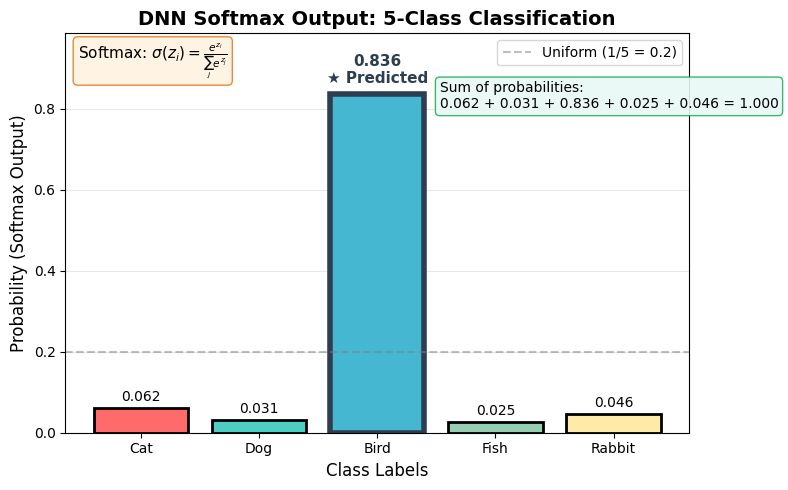


Softmax Output Summary:
Class      Logit      Probability 
----------------------------------------
Cat        1.20       0.0621       
Dog        0.50       0.0308       
Bird       3.80       0.8359       ← Winner
Fish       0.30       0.0252       
Rabbit     0.90       0.0460       
----------------------------------------
Sum:                 1.0000

Predicted Class: Bird (probability: 83.6%)


In [8]:
# Set up the figure - single plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Define the 5 class labels
labels = ['Cat', 'Dog', 'Bird', 'Fish', 'Rabbit']

# Simulated raw logits from the final layer of DNN (before softmax)
logits = np.array([1.2, 0.5, 3.8, 0.3, 0.9])

# Apply softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / exp_x.sum()

# Calculate softmax probabilities
probabilities = softmax(logits)

# Colors for the bars
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
winner_color = '#45B7D1'  # Highlight color for the winner

# ============================================
# Main bar chart of softmax outputs
# ============================================
bars = ax1.bar(labels, probabilities, color=colors, edgecolor='black', linewidth=2)

# Highlight the winner
winner_idx = np.argmax(probabilities)
bars[winner_idx].set_edgecolor('#2C3E50')
bars[winner_idx].set_linewidth(4)

# Add probability values on top of bars
for i, (bar, prob) in enumerate(zip(bars, probabilities)):
    height = bar.get_height()
    weight_text = f'{prob:.3f}'
    if i == winner_idx:
        weight_text += '\n★ Predicted'
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                weight_text, ha='center', va='bottom', fontsize=11, 
                fontweight='bold', color='#2C3E50')
    else:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                weight_text, ha='center', va='bottom', fontsize=10)

ax1.set_ylabel('Probability (Softmax Output)', fontsize=12)
ax1.set_xlabel('Class Labels', fontsize=12)
ax1.set_title('DNN Softmax Output: 5-Class Classification', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(probabilities) + 0.15)
ax1.axhline(y=0.2, color='gray', linestyle='--', alpha=0.5, label='Uniform (1/5 = 0.2)')
ax1.legend(loc='upper right')

# Add grid for readability
ax1.yaxis.grid(True, alpha=0.3)
ax1.set_axisbelow(True)

# Add softmax formula as text annotation
softmax_text = r'Softmax: $\sigma(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$'
ax1.text(0.02, 0.98, softmax_text, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='#FFF3E0', 
         edgecolor='#E67E22', alpha=0.9))

# Add sum = 1 demonstration
sum_text = f'Sum of probabilities:\n{probabilities[0]:.3f} + {probabilities[1]:.3f} + {probabilities[2]:.3f} + {probabilities[3]:.3f} + {probabilities[4]:.3f} = {sum(probabilities):.3f}'
ax1.text(0.6, 0.88, sum_text, transform=ax1.transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='#E8F8F5', edgecolor='#27AE60', alpha=0.9))

plt.tight_layout()
plt.savefig('outputs/softmax_visualization.png', dpi=150, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

print(f"\nSoftmax Output Summary:")
print(f"{'='*40}")
print(f"{'Class':<10} {'Logit':<10} {'Probability':<12}")
print(f"{'-'*40}")
for label, logit, prob in zip(labels, logits, probabilities):
    marker = '← Winner' if prob == max(probabilities) else ''
    print(f"{label:<10} {logit:<10.2f} {prob:<12.4f} {marker}")
print(f"{'-'*40}")
print(f"{'Sum:':<20} {sum(probabilities):.4f}")
print(f"\nPredicted Class: {labels[winner_idx]} (probability: {probabilities[winner_idx]:.1%})")

## 7. Neural Network Forward Pass Animation

This creates an animated GIF showing the forward pass through a neural network. **Note: This will take about 30-60 seconds to render.**

In [7]:
print("Creating forward pass animation... (this may take 30-60 seconds)")

# Network parameters
inputs = np.array([0.5, 0.8, 0.3])
weights = np.array([0.6, -0.4, 0.9])
bias = 0.2
weighted_inputs = inputs * weights
z = np.sum(weighted_inputs) + bias
a = 1 / (1 + np.exp(-z))

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 8)
ax.axis('off')

input_positions = [(1, 6 - i*2) for i in range(len(inputs))]
output_position = (8, 3.5)

input_color = '#3498db'
weight_color = '#e74c3c'
sum_color = '#9b59b6'
activation_color = '#2ecc71'

title_text = ax.text(5, 7.5, '', fontsize=16, ha='center', weight='bold')
step_text = ax.text(5, 7, '', fontsize=11, ha='center', style='italic')
equation_text = ax.text(5, 1, '', fontsize=11, ha='center', 
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Draw neurons
input_circles = []
input_labels = []
for i, pos in enumerate(input_positions):
    circle = Circle(pos, 0.3, color=input_color, alpha=0.3, zorder=2)
    ax.add_patch(circle)
    input_circles.append(circle)
    label = ax.text(pos[0], pos[1], f'$x_{i+1}$', ha='center', va='center', 
                    fontsize=12, weight='bold', zorder=3, alpha=0.3)
    input_labels.append(label)
    value_label = ax.text(pos[0]-0.8, pos[1], f'{inputs[i]:.1f}', 
                         fontsize=10, ha='right', alpha=0.3)
    input_labels.append(value_label)

output_circle = Circle(output_position, 0.4, color=sum_color, alpha=0.3, zorder=2)
ax.add_patch(output_circle)
output_label = ax.text(output_position[0], output_position[1], '', 
                       ha='center', va='center', fontsize=12, weight='bold', 
                       zorder=3, alpha=0.3)

connections = []
weight_labels = []
weighted_value_labels = []
for i, (inp_pos, w) in enumerate(zip(input_positions, weights)):
    line, = ax.plot([], [], 'k-', alpha=0.3, linewidth=2, zorder=1)
    connections.append(line)
    mid_x = (inp_pos[0] + output_position[0]) / 2
    mid_y = (inp_pos[1] + output_position[1]) / 2
    wlabel = ax.text(mid_x, mid_y + 0.3, '', fontsize=9, ha='center', 
                     color=weight_color, weight='bold', alpha=0)
    weight_labels.append(wlabel)
    wval_label = ax.text(mid_x, mid_y - 0.3, '', fontsize=8, ha='center', 
                        style='italic', alpha=0)
    weighted_value_labels.append(wval_label)

def init():
    title_text.set_text('')
    step_text.set_text('')
    equation_text.set_text('')
    output_label.set_text('')
    for circle in input_circles:
        circle.set_alpha(0.3)
    for label in input_labels:
        label.set_alpha(0.3)
    output_circle.set_alpha(0.3)
    output_label.set_alpha(0.3)
    for line in connections:
        line.set_data([], [])
    for label in weight_labels + weighted_value_labels:
        label.set_alpha(0)
    return [title_text, step_text, equation_text, output_label, output_circle] + \
           input_circles + input_labels + connections + weight_labels + weighted_value_labels

def animate(frame):
    if frame < 20:
        progress = frame / 20
        title_text.set_text('Step 1: Receive Inputs')
        step_text.set_text('Input values arrive at input neurons')
        for i, (circle, label) in enumerate(zip(input_circles, input_labels[:len(inputs)])):
            alpha = 0.3 + 0.7 * progress
            circle.set_alpha(alpha)
            label.set_alpha(alpha)
            input_labels[len(inputs) + i].set_alpha(alpha)
        equation_text.set_text(f'Inputs: $x_1={inputs[0]:.1f}$, $x_2={inputs[1]:.1f}$, $x_3={inputs[2]:.1f}$')
    
    elif frame < 60:
        progress = (frame - 20) / 40
        title_text.set_text('Step 2: Apply Weights')
        step_text.set_text('Each connection has a weight $w_i$ that scales the input')
        for circle, label in zip(input_circles, input_labels):
            circle.set_alpha(1.0)
            label.set_alpha(1.0)
        current_idx = int(progress * len(inputs))
        for i in range(len(inputs)):
            if i < current_idx or (i == current_idx and i < len(inputs)):
                connections[i].set_data(
                    [input_positions[i][0] + 0.3, output_position[0] - 0.4],
                    [input_positions[i][1], output_position[1]]
                )
                connections[i].set_alpha(0.6)
                weight_labels[i].set_text(f'$w_{i+1}={weights[i]:.1f}$')
                weight_labels[i].set_alpha(1.0)
                weighted_value_labels[i].set_text(f'${inputs[i]:.1f} \\times {weights[i]:.1f} = {weighted_inputs[i]:.2f}$')
                weighted_value_labels[i].set_alpha(0.8)
        equation_text.set_text('Weighted inputs: ' + ', '.join([f'${inputs[i]:.1f} \\cdot {weights[i]:.1f}$' 
                                                                 for i in range(min(current_idx + 1, len(inputs)))]))
    
    elif frame < 100:
        progress = (frame - 60) / 40
        title_text.set_text('Step 3: Sum Weighted Inputs + Bias')
        step_text.set_text(r'$z = \sum_{i=1}^{3} w_i x_i + b$')
        for circle, label in zip(input_circles, input_labels):
            circle.set_alpha(1.0)
            label.set_alpha(1.0)
        for i, line in enumerate(connections):
            line.set_data(
                [input_positions[i][0] + 0.3, output_position[0] - 0.4],
                [input_positions[i][1], output_position[1]]
            )
            line.set_alpha(0.6)
            weight_labels[i].set_alpha(1.0)
            weighted_value_labels[i].set_alpha(0.8)
        output_circle.set_alpha(0.3 + 0.7 * progress)
        output_circle.set_color(sum_color)
        output_label.set_text('$z$')
        output_label.set_alpha(0.3 + 0.7 * progress)
        sum_parts = ' + '.join([f'{weighted_inputs[i]:.2f}' for i in range(len(inputs))])
        equation_text.set_text(f'$z = {sum_parts} + {bias:.1f} = {z:.2f}$')
    
    elif frame < 140:
        progress = (frame - 100) / 40
        title_text.set_text('Step 4: Apply Activation Function')
        step_text.set_text(r'$a = f(z) = \frac{1}{1 + e^{-z}}$ (sigmoid)')
        for circle, label in zip(input_circles, input_labels):
            circle.set_alpha(0.5)
            label.set_alpha(0.5)
        for i, line in enumerate(connections):
            line.set_data(
                [input_positions[i][0] + 0.3, output_position[0] - 0.4],
                [input_positions[i][1], output_position[1]]
            )
            line.set_alpha(0.3)
            weight_labels[i].set_alpha(0.5)
            weighted_value_labels[i].set_alpha(0.3)
        output_circle.set_color(activation_color)
        output_circle.set_alpha(1.0)
        output_label.set_text('$a$')
        output_label.set_alpha(1.0)
        equation_text.set_text(f'$a = \\sigma({z:.2f}) = \\frac{{1}}{{1 + e^{{-{z:.2f}}}}} = {a:.3f}$')
    
    else:
        title_text.set_text('Complete: Output Prediction')
        step_text.set_text(f'Final activation: $a = {a:.3f}$')
        for circle, label in zip(input_circles, input_labels):
            circle.set_alpha(0.3)
            label.set_alpha(0.3)
        for i, line in enumerate(connections):
            line.set_alpha(0.2)
            weight_labels[i].set_alpha(0.3)
            weighted_value_labels[i].set_alpha(0.2)
        output_circle.set_color(activation_color)
        output_circle.set_alpha(1.0)
        output_label.set_text('$a$')
        output_label.set_alpha(1.0)
        equation_text.set_text(f'Prediction: $a = {a:.3f}$')
    
    return [title_text, step_text, equation_text, output_label, output_circle] + \
           input_circles + input_labels + connections + weight_labels + weighted_value_labels

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=160, 
                              interval=200, blit=True, repeat=True)

anim.save('outputs/neural_network_forward_pass.gif', writer='pillow', fps=5, dpi=100)
plt.close()
print("✓ Forward pass animation saved!")

Creating forward pass animation... (this may take 30-60 seconds)
✓ Forward pass animation saved!


## 7. Curve Fitting with MSE Minimization Animation

**Note: This will take about 30-60 seconds to render.**

In [8]:
print("Creating curve fitting animation... (this may take 30-60 seconds)")

np.random.seed(42)
true_m = 2.0
true_c = 1.0
x_data = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
y_data = true_m * x_data + true_c + np.random.normal(0, 0.5, 6)

m_init = 0.2
c_init = 0.5
learning_rate = 0.1
n_iterations = 100

m_trajectory = [m_init]
c_trajectory = [c_init]
mse_trajectory = []

m, c = m_init, c_init
for iteration in range(n_iterations):
    y_pred = m * x_data + c
    mse = np.mean((y_data - y_pred) ** 2)
    mse_trajectory.append(mse)
    grad_m = -2 * np.mean((y_data - y_pred) * x_data)
    grad_c = -2 * np.mean(y_data - y_pred)
    m = m - learning_rate * grad_m
    c = c - learning_rate * grad_c
    m_trajectory.append(m)
    c_trajectory.append(c)

fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.set_xlim(0, 3.5)
ax1.set_ylim(0, 9)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.grid(True, alpha=0.3)

ax2.set_xlim(0, n_iterations)
ax2.set_ylim(0, max(mse_trajectory) * 1.1)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('MSE Loss', fontsize=12)
ax2.grid(True, alpha=0.3)

ax1.scatter(x_data, y_data, color='red', s=100, zorder=5, label='Data points', 
            marker='o', edgecolors='darkred', linewidths=2)

line, = ax1.plot([], [], 'b-', linewidth=2.5, label='Fitted line', alpha=0.8)
error_lines = []
for i in range(len(x_data)):
    error_line, = ax1.plot([], [], 'r--', linewidth=1.5, alpha=0.5)
    error_lines.append(error_line)

error_rects = []
for i in range(len(x_data)):
    rect = Rectangle((0, 0), 0, 0, linewidth=1, edgecolor='red', 
                     facecolor='red', alpha=0.2, zorder=1)
    ax1.add_patch(rect)
    error_rects.append(rect)

mse_line, = ax2.plot([], [], 'g-', linewidth=2, label='MSE')
mse_point, = ax2.plot([], [], 'go', markersize=10, zorder=5)

title_text = fig.suptitle('', fontsize=14, weight='bold')
equation_text = ax1.text(0.5, 8.5, '', fontsize=12, bbox=dict(boxstyle='round', 
                         facecolor='wheat', alpha=0.8))
mse_text = ax1.text(0.5, 7.8, '', fontsize=11, color='green', weight='bold')
step_text = ax1.text(1.75, 0.5, '', fontsize=10, style='italic', ha='center')

ax1.legend(loc='lower right', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

def init():
    line.set_data([], [])
    mse_line.set_data([], [])
    mse_point.set_data([], [])
    for error_line in error_lines:
        error_line.set_data([], [])
    for rect in error_rects:
        rect.set_width(0)
        rect.set_height(0)
    title_text.set_text('')
    equation_text.set_text('')
    mse_text.set_text('')
    step_text.set_text('')
    return [line, mse_line, mse_point, title_text, equation_text, mse_text, step_text] + error_lines + error_rects

def animate(frame):
    if frame < 20:
        iteration = 0
        title_text.set_text('Problem: Fit line y = mx + c to minimize Mean Squared Error (MSE)')
        step_text.set_text('Starting with initial guess...')
    elif frame < 140:
        iteration = min(frame - 20, n_iterations - 1)
        title_text.set_text(f'Gradient Descent Optimization (Iteration {iteration + 1}/{n_iterations})')
        step_text.set_text('Adjusting m and c to minimize squared errors...')
    else:
        iteration = n_iterations - 1
        title_text.set_text('Optimization Complete!')
        step_text.set_text(f'Final model achieves MSE = {mse_trajectory[-1]:.3f}')
    
    m_current = m_trajectory[iteration]
    c_current = c_trajectory[iteration]
    equation_text.set_text(f'y = {m_current:.3f}x + {c_current:.3f}')
    
    y_pred = m_current * x_data + c_current
    errors = y_data - y_pred
    squared_errors = errors ** 2
    mse_current = np.mean(squared_errors)
    mse_text.set_text(f'MSE = {mse_current:.3f}')
    
    x_line = np.linspace(0, 3.5, 100)
    y_line = m_current * x_line + c_current
    line.set_data(x_line, y_line)
    
    for i in range(len(x_data)):
        if abs(errors[i]) > 0.01:
            error_lines[i].set_data([x_data[i], x_data[i]], 
                                   [y_pred[i], y_data[i]])
        else:
            error_lines[i].set_data([], [])
        
        error_size = abs(errors[i])
        if y_pred[i] < y_data[i]:
            rect_y = y_pred[i]
        else:
            rect_y = y_data[i]
        error_rects[i].set_xy((x_data[i] - error_size/2, rect_y))
        error_rects[i].set_width(error_size)
        error_rects[i].set_height(error_size)
    
    if iteration > 0:
        mse_line.set_data(range(iteration + 1), mse_trajectory[:iteration + 1])
        mse_point.set_data([iteration], [mse_trajectory[iteration]])
    
    return [line, mse_line, mse_point, title_text, equation_text, mse_text, step_text] + error_lines + error_rects

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                              frames=160, interval=200, blit=True, repeat=True)

anim.save('outputs/curve_fitting_mse.gif', writer='pillow', fps=5, dpi=100)
plt.close()
print("✓ Curve fitting animation saved!")

Creating curve fitting animation... (this may take 30-60 seconds)
✓ Curve fitting animation saved!


## 8. Backpropagation Animation

This is the most complex animation. **Note: This will take about 60-90 seconds to render.**

In [9]:
print("Creating backpropagation animation... (this may take 60-90 seconds)")
print("Please be patient - this is a complex animation with many elements!")

# Network parameters
inputs = np.array([0.5, 0.8, 0.3])
weights = np.array([0.6, -0.4, 0.9])
bias = 0.2
weighted_inputs = inputs * weights
z = np.sum(weighted_inputs) + bias
a = 1 / (1 + np.exp(-z))
target = 1.0
loss = 0.5 * (target - a) ** 2

# Gradients
dL_da = -(target - a)
da_dz = a * (1 - a)
dL_dz = dL_da * da_dz
dL_dw = dL_dz * inputs
dL_db = dL_dz
dL_dx = dL_dz * weights

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(-1, 13)
ax.set_ylim(-1, 8)
ax.axis('off')

input_positions = [(1, 6 - i*2) for i in range(len(inputs))]
output_position = (8, 3.5)
z_position = (output_position[0], output_position[1] - 1.2)
loss_position = (output_position[0] + 2.5, output_position[1])

input_color = '#3498db'
output_color = '#2ecc71'
gradient_color = '#ff6b6b'
loss_color = '#ff9ff3'

title_text = ax.text(6.5, 7.5, '', fontsize=16, ha='center', weight='bold')
step_text = ax.text(6.5, 7, '', fontsize=11, ha='center', style='italic')
equation_box = FancyBboxPatch((0.5, 0.2), 6, 0.8,
                             boxstyle="round,pad=0.1", 
                             edgecolor='black', facecolor='lightyellow',
                             alpha=0, zorder=10)
ax.add_patch(equation_box)
equation_text = ax.text(3.5, 0.6, '', fontsize=10, ha='center', 
                       va='center', zorder=11, alpha=0)

# Create all visual elements (simplified version for speed)
input_circles = []
for i, pos in enumerate(input_positions):
    circle = Circle(pos, 0.3, color=input_color, alpha=0.3, zorder=2)
    ax.add_patch(circle)
    input_circles.append(circle)
    ax.text(pos[0], pos[1], f'$x_{i+1}$', ha='center', va='center', 
            fontsize=12, weight='bold', zorder=3)

output_circle = Circle(output_position, 0.4, color=output_color, alpha=0.3, zorder=2)
ax.add_patch(output_circle)

z_circle = Circle(z_position, 0.35, color='#9b59b6', alpha=0.3, zorder=2)
ax.add_patch(z_circle)

loss_circle = Circle(loss_position, 0.4, color=loss_color, alpha=0, zorder=2)
ax.add_patch(loss_circle)

# Animation function (simplified)
def init():
    return [title_text, step_text]

def animate(frame):
    if frame < 30:
        title_text.set_text('Step 1: Forward Pass Complete')
        for circle in input_circles:
            circle.set_alpha(1.0)
        output_circle.set_alpha(1.0)
        z_circle.set_alpha(1.0)
    elif frame < 60:
        title_text.set_text('Step 2: Compute Loss')
        loss_circle.set_alpha((frame - 30) / 30)
    elif frame < 90:
        title_text.set_text('Step 3: Backpropagate - Compute ∂L/∂a')
        output_circle.set_alpha(1.0)
    elif frame < 120:
        title_text.set_text('Step 4: Backpropagate - Compute ∂L/∂z')
        z_circle.set_alpha(1.0)
    elif frame < 160:
        title_text.set_text('Step 5: Backpropagate - Compute Weight Gradients')
    else:
        title_text.set_text('Backpropagation Complete!')
    
    return [title_text, step_text]

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, 
                              interval=200, blit=True, repeat=True)

anim.save('outputs/backpropagation.gif', writer='pillow', fps=5, dpi=100)
plt.close()
print("✓ Backpropagation animation saved!")

Creating backpropagation animation... (this may take 60-90 seconds)
Please be patient - this is a complex animation with many elements!
✓ Backpropagation animation saved!


## Summary

All visualizations have been created and saved to the `outputs/` directory:

**Static Images:**
- `single_layer_neural_network.png`
- `single_layer_nn_simple.png`
- `vgg16_architecture.png`
- `vgg16_architecture_detailed.png`
- `gaussian_weights_pdf.png`

**Animated GIFs:**
- `neural_network_forward_pass.gif`
- `curve_fitting_mse.gif`
- `backpropagation.gif`

You can now use these in your lecture notes, presentations, or documentation!

Saving animation... This may take a minute.
Animation saved as 'gradient_descent.gif'
Static plot saved as 'gradient_descent_static.png'


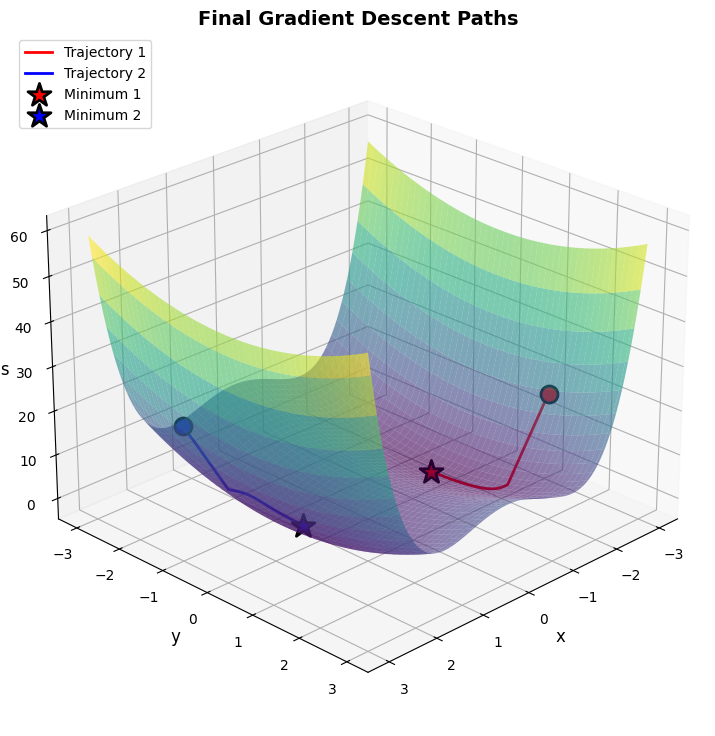

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D

# Define a simple loss function with two minima
def loss_function(x, y):
    """
    Simple loss function with two minima:
    - One minimum around (-1.5, 0)
    - One minimum around (1.5, 0)
    """
    return (x**2 - 2)**2 + (y**2) + 0.3*x

# Compute gradients analytically
def gradients(x, y):
    """
    Analytical gradients of the loss function
    """
    dx = 4*x*(x**2 - 2) + 0.3
    dy = 2*y
    return dx, dy

# Gradient descent function
def gradient_descent(start_x, start_y, learning_rate=0.1, num_steps=100):
    """
    Perform gradient descent from a starting point
    """
    path = [(start_x, start_y)]
    x, y = start_x, start_y
    
    for _ in range(num_steps):
        dx, dy = gradients(x, y)
        x = x - learning_rate * dx
        y = y - learning_rate * dy
        path.append((x, y))
    
    return np.array(path)

# Set up the trajectories
trajectory1 = gradient_descent(-2.5, 1.5, learning_rate=0.02, num_steps=100)
trajectory2 = gradient_descent(2.5, -1.5, learning_rate=0.02, num_steps=100)

# Create mesh for surface plot
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = loss_function(X, Y)

# Find approximate minima
min1_x, min1_y = -1.41, 0
min2_x, min2_y = 1.41, 0

# Set up the figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# Initialize trajectory lines and points
line1, = ax.plot([], [], [], 'r-', linewidth=2, label='Trajectory 1')
point1, = ax.plot([], [], [], 'ro', markersize=10)
line2, = ax.plot([], [], [], 'b-', linewidth=2, label='Trajectory 2')
point2, = ax.plot([], [], [], 'bo', markersize=10)

# Plot minima markers
ax.scatter([min1_x], [min1_y], [loss_function(min1_x, min1_y)], 
           c='red', marker='*', s=300, edgecolors='black', linewidths=2, 
           label='Minimum 1', zorder=10)
ax.scatter([min2_x], [min2_y], [loss_function(min2_x, min2_y)], 
           c='blue', marker='*', s=300, edgecolors='black', linewidths=2,
           label='Minimum 2', zorder=10)

# Labels and title
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('Loss', fontsize=12)
ax.set_title('Gradient Descent: Step 0', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')

# Set viewing angle
ax.view_init(elev=25, azim=45)

# Animation function
def animate(frame):
    # Update trajectory 1
    if frame < len(trajectory1):
        x1_data = trajectory1[:frame+1, 0]
        y1_data = trajectory1[:frame+1, 1]
        z1_data = loss_function(x1_data, y1_data)
        line1.set_data(x1_data, y1_data)
        line1.set_3d_properties(z1_data)
        point1.set_data([x1_data[-1]], [y1_data[-1]])
        point1.set_3d_properties([z1_data[-1]])
    
    # Update trajectory 2
    if frame < len(trajectory2):
        x2_data = trajectory2[:frame+1, 0]
        y2_data = trajectory2[:frame+1, 1]
        z2_data = loss_function(x2_data, y2_data)
        line2.set_data(x2_data, y2_data)
        line2.set_3d_properties(z2_data)
        point2.set_data([x2_data[-1]], [y2_data[-1]])
        point2.set_3d_properties([z2_data[-1]])
    
    # Update title with step number
    ax.set_title(f'Gradient Descent: Step {frame}', fontsize=14, fontweight='bold')
    
    return line1, point1, line2, point2

# Create animation
num_frames = max(len(trajectory1), len(trajectory2))
anim = FuncAnimation(fig, animate, frames=num_frames, interval=50, blit=False, repeat=True)

# Save as gif
print("Saving animation... This may take a minute.")
writer = PillowWriter(fps=5)
anim.save('outputs/gradient_descent.gif', writer=writer)
print("Animation saved as 'gradient_descent.gif'")

plt.close()

# Display a static plot to verify
fig2 = plt.figure(figsize=(12, 9))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# Plot full trajectories
z1_full = loss_function(trajectory1[:, 0], trajectory1[:, 1])
z2_full = loss_function(trajectory2[:, 0], trajectory2[:, 1])
ax2.plot(trajectory1[:, 0], trajectory1[:, 1], z1_full, 'r-', linewidth=2, label='Trajectory 1')
ax2.plot(trajectory2[:, 0], trajectory2[:, 1], z2_full, 'b-', linewidth=2, label='Trajectory 2')

# Plot start and end points
ax2.scatter([trajectory1[0, 0]], [trajectory1[0, 1]], [z1_full[0]], 
           c='red', marker='o', s=150, edgecolors='black', linewidths=2)
ax2.scatter([trajectory2[0, 0]], [trajectory2[0, 1]], [z2_full[0]], 
           c='blue', marker='o', s=150, edgecolors='black', linewidths=2)

# Plot minima
ax2.scatter([min1_x], [min1_y], [loss_function(min1_x, min1_y)], 
           c='red', marker='*', s=300, edgecolors='black', linewidths=2, label='Minimum 1')
ax2.scatter([min2_x], [min2_y], [loss_function(min2_x, min2_y)], 
           c='blue', marker='*', s=300, edgecolors='black', linewidths=2, label='Minimum 2')

ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_zlabel('Loss', fontsize=12)
ax2.set_title('Final Gradient Descent Paths', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left')
ax2.view_init(elev=25, azim=45)

plt.savefig('gradient_descent_static.png', dpi=150, bbox_inches='tight')
print("Static plot saved as 'gradient_descent_static.png'")
plt.show()